# Diccionario de variables

- id_colaborador - Identificador único del colaborador.
- id_ultimo_jefe - Identificador único del que corresponde al jefe o responsable.
- seniority - 1: Para quienes no tienen personal a su cargo, 2: Para los que sí tienen.
- modalidad_trabajo - Es la modalidad de trabajo especificada en el contrato del colaborador.
- distancia_oficina - Es la distancia en kilómetros que debe recorrer el colaborador desde su hogar para llegar a su sede.
- dias_baja_salud - Es el número de días de bajas justificadas por enfermedad desde que inició labores.
- genero - Especifica si es Hombre o Mujer
- canal_reclutamiento - Indica el medio por el cual se dio el proceso de postulación.
- permanencia_promedio - Es el tiempo promedio en años que el colaborador duró en sus experiencias laborales anteriores.
- fecha_nacimiento - Es la fecha de nacimiento en formato dd/mm/aaaa.
- salario - Es el monto correspondiente a la remuneración mensual percibida.
- psi_score - Es el puntaje obtenido en el test psicométrico durante el proceso de selección.
- fecha_incorporación - Se refiere al día en el que el colaborador comienza oficialmente a trabajar en la empresa.
- estado_civil - Se refiere a la situación legal en términos de relaciones personales formales reconocidas por la ley.
- performance_score - Es el puntaje obtenido por el colaborador en su última evaluación trimestral si tuviera.
- abandono_6meses - Es igual a "0" si continua laborando ó "1" si ya dejó la compañía en sus primeros 6 meses

# Carga de Datos

In [1]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

In [2]:
# Tamano de las graficas
sns.set(
    rc={
        'figure.figsize':(9, 9)
    }
)

In [3]:
# Estilo de graficas
sns.set_theme(style="whitegrid")

In [4]:
# carga de datos
df = pd.read_csv('./test_data.csv', sep=';')
df.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,19/01/1997,181654,99,81,24/07/2021,Soltero
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,20/08/1999,140986,97,75,27/01/2018,Soltero
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,29/10/1984,406690,96,69,24/04/2022,Soltero
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,9/11/1992,249107,95,73,23/05/2023,Casado
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,14/07/1969,698318,95,81,20/06/2015,Viudo


In [5]:
# tamano del dataset
df.shape

(2020, 15)

# Tratamiento Valores Faltantes

In [6]:
# variables con sus respectivos valores faltantes
df.isnull().sum()

id_colaborador           0
id_ultimo_jefe          83
seniority                0
modalidad_trabajo        0
distancia_oficina        0
dias_baja_salud          0
genero                   0
canal_reclutamiento      0
permanencia_promedio     0
fecha_nacimiento         0
salario                  0
performance_score        0
psi_score                0
fecha_incorporacion      0
estado_civil             0
dtype: int64

Valores faltantes en las variables id_ultimo_jefe. Hay que revisar la relacion de los missing de esta variable con las demas

In [7]:
# Codigo para correr las funciones de utils.ipynb
%run utils.ipynb

In [8]:
# Cantidad de valores completos
v_complet = df.missing.number_complete()
v_complet

30217

In [9]:
# Cantidad de valores faltantes
v_missing = df.missing.number_missing()
v_missing

83

In [10]:
# Porcentaje de valores faltantes en el dataframe
pct_v = (v_missing/v_complet)*100
pct_v

0.27467981599761726

El 0.27% de los datos son valores faltantes, una cantidad bastante baja por lo que podria eliminarse los registros de manera directa.Sin embargo, para la competencia se requiere una imputacion de valores antes que una eliminacion. Apliquemos un EDA sobre los missing

In [11]:
# Tabla de registros con valores faltantes y completos
df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,0,1937,95.891089
1,1,83,4.108911


In [12]:
# Analisis de intervalos consecutivos de variables donde se encuentran las missing
df.missing.missing_variable_run(variable='id_ultimo_jefe')

,run_length,is_na
0,105,complete
1,1,missing
2,96,complete
3,1,missing
4,120,complete
...,...,...
138,2,complete
139,4,missing
140,1,complete
141,1,missing


La tabla nos indica que los valores faltantes de **id_ultimo_jefe** estan dispersos, no siguen un patron.

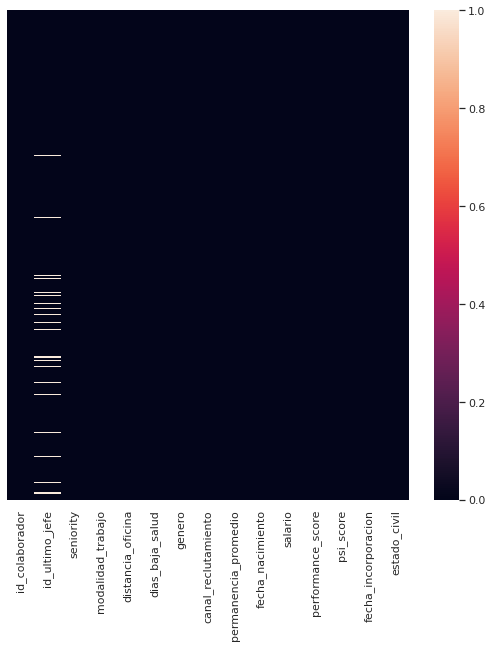

In [13]:
# heatmap de valores faltantes
sns.heatmap(df.isnull(), yticklabels=False);

Vemos que los valores faltantes de **id_ultimo_jefe** se encuentran dispersos. Veamos las relaciones de id_ultimo_viaje con las demas variables para asi aplicar un proceso de imputacion

El promedio de dias de baja por salud es similar para empleados con o sin id_ultimo_jefe por tanto la presencia de missing no influyen en los dias de baja por salud

# Imputacion Simple

In [14]:
df_s = df.copy(deep=True)

In [15]:
import janitor  # limpiar dato

df_jefe = (
    df
    .select_columns('id_ultimo_jefe')
    .fillna(method='ffill')
)

df_jefe

,id_ultimo_jefe
0,102115.0
1,102074.0
2,102150.0
3,102172.0
4,102060.0
...,...
2015,102161.0
2016,102171.0
2017,102144.0
2018,102152.0


In [16]:
df_s['id_ultimo_jefe'] = df_jefe['id_ultimo_jefe']

df_s.isnull().sum()

id_colaborador          0
id_ultimo_jefe          0
seniority               0
modalidad_trabajo       0
distancia_oficina       0
dias_baja_salud         0
genero                  0
canal_reclutamiento     0
permanencia_promedio    0
fecha_nacimiento        0
salario                 0
performance_score       0
psi_score               0
fecha_incorporacion     0
estado_civil            0
dtype: int64

In [17]:
# exportar datos preparados
#df.to_csv('test_data_preparado.csv', index=False)

# Manejo de variables categoricas

In [18]:
# obtener edad de los empleados
# convertimos las variables fecha_incorporacion y fecha_nacimiento en a tipo datetime

# fecha_incorporacion
df['fecha_incorporacion'] = pd.to_datetime(df['fecha_incorporacion'], format='%d/%m/%Y')

# fecha_nacimiento
df['fecha_nacimiento'] = pd.to_datetime(df['fecha_nacimiento'], format='%d/%m/%Y')

# crear variable year_nacimiento
df['year_nacimiento'] = df['fecha_nacimiento'].dt.year.astype(int)

# crear variable year_incorporacion
df['year_incorporacion'] = df['fecha_incorporacion'].dt.year.astype(int)

# eliminar fecha_incorporacion
df = df.drop('fecha_incorporacion', axis=1)

# eliminar fecha_nacimiento
df = df.drop('fecha_nacimiento', axis=1)

df['edad_ingreso'] = df['year_incorporacion'] - df['year_nacimiento']

# eliminar year_nacimiento
df = df.drop('year_nacimiento', axis=1)

# eliminar year_incorporacion
df = df.drop('year_incorporacion', axis=1)

# mostrar resultados
df.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,edad_ingreso
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,181654,99,81,Soltero,24
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,140986,97,75,Soltero,19
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,406690,96,69,Soltero,38
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,249107,95,73,Casado,31
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,698318,95,81,Viudo,46


In [19]:
# nombre de las variables categoricas
categorical_v = (
    df.select_dtypes(include=[object, 'category']).columns
)
categorical_v

Index(['modalidad_trabajo', 'genero', 'canal_reclutamiento', 'estado_civil'], dtype='object')

In [20]:
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing


# funcion transformador 

categorical_transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(), categorical_v),
    remainder='passthrough'
)

categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['modalidad_trabajo', 'genero', 'canal_reclutamiento', 'estado_civil'], dtype='object'))])

In [21]:
# dataframe transformado
(
    pd.DataFrame(
        categorical_transformer.fit_transform(df)
    )
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,2.0,100486.0,102115.0,1.0,0.795,2.0,2.0,181654.0,99.0,81.0,24.0
1,0.0,1.0,0.0,2.0,103752.0,102074.0,1.0,1.715,1.0,1.0,140986.0,97.0,75.0,19.0
2,0.0,0.0,3.0,2.0,103937.0,102150.0,1.0,2.375,1.0,6.0,406690.0,96.0,69.0,38.0
3,0.0,0.0,2.0,0.0,101744.0,102172.0,1.0,2.185,3.0,3.0,249107.0,95.0,73.0,31.0
4,0.0,0.0,4.0,3.0,101037.0,102060.0,1.0,4.660,3.0,10.0,698318.0,95.0,81.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,1.0,1.0,3.0,2.0,103755.0,102161.0,1.0,2.995,2.0,16.0,700814.0,90.0,69.0,53.0
2016,1.0,1.0,3.0,1.0,103976.0,102171.0,1.0,2.775,0.0,5.0,677071.0,93.0,66.0,53.0
2017,1.0,0.0,3.0,2.0,104115.0,102144.0,1.0,3.990,1.0,7.0,876285.0,84.0,69.0,53.0
2018,1.0,1.0,2.0,2.0,103920.0,102152.0,1.0,7.100,1.0,8.0,719102.0,91.0,75.0,55.0


In [22]:
# agregar los nombre originales de cada variable
# agregar los indices

df_tra = (
    pd.DataFrame(
        categorical_transformer.fit_transform(df),
        columns=categorical_transformer.get_feature_names_out(), # obtener nombres
        index=df.index   # obtener indices
    )
    # eliminar prefijo de las variables
    .rename(
        columns=lambda x: x.replace('remainder__', '').replace('ordinalencoder__', '')
    )
)

df_tra

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso
0,0.0,0.0,0.0,2.0,100486.0,102115.0,1.0,0.795,2.0,2.0,181654.0,99.0,81.0,24.0
1,0.0,1.0,0.0,2.0,103752.0,102074.0,1.0,1.715,1.0,1.0,140986.0,97.0,75.0,19.0
2,0.0,0.0,3.0,2.0,103937.0,102150.0,1.0,2.375,1.0,6.0,406690.0,96.0,69.0,38.0
3,0.0,0.0,2.0,0.0,101744.0,102172.0,1.0,2.185,3.0,3.0,249107.0,95.0,73.0,31.0
4,0.0,0.0,4.0,3.0,101037.0,102060.0,1.0,4.660,3.0,10.0,698318.0,95.0,81.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,1.0,1.0,3.0,2.0,103755.0,102161.0,1.0,2.995,2.0,16.0,700814.0,90.0,69.0,53.0
2016,1.0,1.0,3.0,1.0,103976.0,102171.0,1.0,2.775,0.0,5.0,677071.0,93.0,66.0,53.0
2017,1.0,0.0,3.0,2.0,104115.0,102144.0,1.0,3.990,1.0,7.0,876285.0,84.0,69.0,53.0
2018,1.0,1.0,2.0,2.0,103920.0,102152.0,1.0,7.100,1.0,8.0,719102.0,91.0,75.0,55.0


# Imputacion con MICE

In [23]:
df = df_tra.copy(deep=True)

In [24]:
df.isnull().sum()

modalidad_trabajo        0
genero                   0
canal_reclutamiento      0
estado_civil             0
id_colaborador           0
id_ultimo_jefe          83
seniority                0
distancia_oficina        0
dias_baja_salud          0
permanencia_promedio     0
salario                  0
performance_score        0
psi_score                0
edad_ingreso             0
dtype: int64

In [25]:
# librerias
import sklearn.impute
from sklearn.neighbors import KNeighborsRegressor
import sklearn.compose

In [26]:
# librerias
import sklearn.impute
from sklearn.neighbors import KNeighborsRegressor
import sklearn.compose

# creamos el imputador con knn
knn_imputer = sklearn.impute.KNNImputer()

# copia del dataframe
df_knn = df.copy(deep=True)

# imputacion de los valores faltantes
df_knn.iloc[:, :] = knn_imputer.fit_transform(df).round()

df_knn.isnull().sum()

modalidad_trabajo       0
genero                  0
canal_reclutamiento     0
estado_civil            0
id_colaborador          0
id_ultimo_jefe          0
seniority               0
distancia_oficina       0
dias_baja_salud         0
permanencia_promedio    0
salario                 0
performance_score       0
psi_score               0
edad_ingreso            0
dtype: int64

In [27]:
(
    categorical_transformer # funcion que transforma los valores
    .named_transformers_    # nombre de las transformaciones realizadas a los datos
)

{'ordinalencoder': OrdinalEncoder(), 'remainder': 'passthrough'}

In [28]:
(
    categorical_transformer # funcion que transforma los valores
    .named_transformers_    # nombre de las transformaciones realizadas a los datos
    .ordinalencoder
)

OrdinalEncoder()

In [29]:
# las variables estan guardadas en categorical_columns
(
    categorical_transformer # funcion que transforma los valores
    .named_transformers_    # nombre de las transformaciones realizadas a los datos
    .ordinalencoder
    .inverse_transform(
        X=df_knn[categorical_v]
    )
)

array([['Híbrida', 'Hombre', 'Ferias & Networking', 'Soltero'],
       ['Híbrida', 'Mujer', 'Ferias & Networking', 'Soltero'],
       ['Híbrida', 'Hombre', 'Portal Web', 'Soltero'],
       ...,
       ['Presencial', 'Hombre', 'Portal Web', 'Soltero'],
       ['Presencial', 'Mujer', 'Linkedin', 'Soltero'],
       ['Presencial', 'Mujer', 'Referidos', 'Casado']], dtype=object)

In [30]:
df_knn[categorical_v] = (
    categorical_transformer # funcion que transforma los valores
    .named_transformers_    # nombre de las transformaciones realizadas a los datos
    .ordinalencoder
    .inverse_transform(
        X=df_knn[categorical_v]
    )
)

df_knn

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso
0,Híbrida,Hombre,Ferias & Networking,Soltero,100486.0,102115.0,1.0,1.0,2.0,2.0,181654.0,99.0,81.0,24.0
1,Híbrida,Mujer,Ferias & Networking,Soltero,103752.0,102074.0,1.0,2.0,1.0,1.0,140986.0,97.0,75.0,19.0
2,Híbrida,Hombre,Portal Web,Soltero,103937.0,102150.0,1.0,2.0,1.0,6.0,406690.0,96.0,69.0,38.0
3,Híbrida,Hombre,Linkedin,Casado,101744.0,102172.0,1.0,2.0,3.0,3.0,249107.0,95.0,73.0,31.0
4,Híbrida,Hombre,Referidos,Viudo,101037.0,102060.0,1.0,5.0,3.0,10.0,698318.0,95.0,81.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,Presencial,Mujer,Portal Web,Soltero,103755.0,102161.0,1.0,3.0,2.0,16.0,700814.0,90.0,69.0,53.0
2016,Presencial,Mujer,Portal Web,Divorciado,103976.0,102171.0,1.0,3.0,0.0,5.0,677071.0,93.0,66.0,53.0
2017,Presencial,Hombre,Portal Web,Soltero,104115.0,102144.0,1.0,4.0,1.0,7.0,876285.0,84.0,69.0,53.0
2018,Presencial,Mujer,Linkedin,Soltero,103920.0,102152.0,1.0,7.0,1.0,8.0,719102.0,91.0,75.0,55.0


In [31]:
df_knn.isnull().sum()

modalidad_trabajo       0
genero                  0
canal_reclutamiento     0
estado_civil            0
id_colaborador          0
id_ultimo_jefe          0
seniority               0
distancia_oficina       0
dias_baja_salud         0
permanencia_promedio    0
salario                 0
performance_score       0
psi_score               0
edad_ingreso            0
dtype: int64

In [32]:
# exportar datos preparados
#df_knn.to_csv('test_data_preparado2.csv', index=False)